**TITANIC - DATA CLEANING - IRONHACK**

# Understanding the data.

## Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Input data

In [18]:
df = pd.read_csv('./data/train.csv')
titanic = df.copy()

## Overview

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**What does each column stands for?**  
- `PassengerId` -> Identification number for each person 
- `Survived` -> Whether passenger survived or died ->	0 = No, 1 = Yes  
- `Pclass` -> Shows	ticket class ->	1 = 1st, 2 = 2nd, 3 = 3rd
- `Name` -> Passenger's name 
- `Sex` -> Passenger's gender -> male for men, and female for woman	 
- `Age`	-> Passenger's age in years	
- `SibSp` -> With how many siblings or spouses travel this passenger aboard the Titanic	   	
- `Parch` -> With how many parents or children travel this passenger aboard the Titanic	  
- `Ticket` ->	Ticket number	
- `Fare` -> 	Ticket's price	
- `Cabin` -> Cabin number	
- `Embarked` ->	Port of Embarkation	-> C = Cherbourg, Q = Queenstown, S = Southampton




## Number of columns and rows?

In [20]:
titanic.shape

(891, 12)

There are 12 columns and 891 rows (passengers)

## Type of variables (numerical (discrete, continual), categorical(nominal, ordinal), alphanumerical)?

Numerical variables:  
- `Age` (Ordinal - Discrete)  
- `SibSp` (Ordinal - Discrete)  
- `Parch` (Ordinal - Discrete)  
- `Fare` (Ratio - Continual)  

Categorical variables:  
- `PassengerId` (Nominal)
- `Survived` (Nominal - Binary)
- `Pclass` (Ordinal)  
- `Name` (Nominal) 
- `Sex` (Nominal - Binary)  
- `Ticket` (Ordinal - Alphanumerical)
- `Cabin` (Nominal - Alphanumerical)
- `Embarked` (Nominal)



      

## How they are encoded?

In [21]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Although we can improve some variables, everything looks okay. Depending on the analysis we're going to perform it's possible to change data type at a later stage. For now we will leave it the way they are. 

## Statistical summary.

In [22]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What do we know from this table?  

- `PassengerId` tells us that there are 891 passengers on the board. The other metrics aren't valuable because that is categorical variable. 
- `Survived` doesn't tells us something valuable, apart from fact that we know either the passenger survived `1` or died `0`, because is categorical variable. 
- `Pclass` again doesn't tells us something valuable, apart from fact that there are three type of passenger's class from `1`, `2` and `3`. 
- `Age` tells us that there are information for age of 714 passengers, that means that ages of 177 passengers are missing. Initially we know age is fractional if less than 1 year. So the youngest person is baby and the oldest passengers is 80 years old. Also 50% of these 714 people on board are younger or older than 28 years.  
- `SibSp` tells us that there are passengers, which travel without siblings or spouses and also the highest number of siblings or spouses is 8. Half of the people on board travel alone (without siblings or spouses) and the other half with at least one siblings or spouses. 
- `Parch` tells us that there are passengers, which travel without parents or children and also the highest number of parents or children is 6. Half of the people on board travel without parents or children and the other half with at least with one child or parent.  
- `Fare` tells us that the cheapest ticket is free (or there is typo), whereas the most expensive cost 512,33 dollars (or possible outlier).   
  
Although this is a numerical overview of our data, let's keep in mind that our data still is not cleaned and there are missing values. So it's to early for conclusions. 

# Cleaning dataset for visualization

## Dropping duplicates?

In [23]:
titanic.duplicated().sum()

0

In [24]:
titanic.duplicated('PassengerId').sum()

0

There are not duplicated values.

## Missing values?

In [25]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in `Age` and 687 in `Cabin`

### Let's see the ratio of missing values in `Cabin`

In [26]:
missing_values_in_cabin = titanic['Cabin'].isna().sum()
total_values_in_cabin = len(titanic['Cabin'])

ratio_missing_values_in_cabin = ( missing_values_in_cabin / total_values_in_cabin ) * 100

print(f"Missing values in 'Cabin' are: {ratio_missing_values_in_cabin:.2f}%")

Missing values in 'Cabin' are: 77.10%


There are so many missing values in `Cabin`, let's drop this column and save the result in other variable, because we will need uncleaned titanic in future analysis. 

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
titanic_new = titanic.drop('Cabin', axis=1)

In [29]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Let's see the ratio of missing values in `Age`

In [30]:
missing_values_in_age = titanic['Age'].isnull().sum()
total_values_in_age = len(titanic['Age'])

ratio_missing_values_in_age = ( missing_values_in_age / total_values_in_age ) * 100

print(f"Missing values in 'Age' are: {ratio_missing_values_in_age:.2f}%")

Missing values in 'Age' are: 19.87%


Here we have less missing values, so we will try to restore them

### Restoring missing values in `Age` with KNN Imputation

#### Preparation of data for KNN Imputation 

First, we will remove some of the variables that have little or no effect for KNN Imputer.  

Columns to be removed:  
`PassengerId`, `Name`, `Ticket`.

In [31]:
knn_imputation_columns_to_be_removed = ['PassengerId', 'Name', 'Ticket']

knn_df = titanic_new.drop(knn_imputation_columns_to_be_removed, axis = 1)

In [32]:
knn_df.isna().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

As we know initially `KNN Imputer` does not recognize text data values, therefore we will need to dumify our text variables.

In [33]:
knn_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Our categorical variables are `Sex` and `Embarked`. Let's dumify them

In [34]:
# get categorical variables
cat_variables = knn_df[['Sex', 'Embarked']]

# dumify categorical variables
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


From table above we can see that:  
`Sex_male` is = 1 when passenger is male and = 0 when is woman.  
`Embarked_Q` is = 1 when passenger has boarder from Queenstown.  
`Embarked_S` is = 1 when passenger has boarder from Southampton.  
If `Embarked_Q` and `Embarked_S` = 0 this means, that passenger has boarder from Cherbourg. 

Let's put our dumify variables in knn dataframe.  
First drop the old ones and then put the dumify.

In [35]:
knn_df.drop(cat_variables, axis=1, inplace=True)

In [36]:
knn_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [37]:
knn_df = pd.concat([knn_df, cat_dummies], axis=1)

In [38]:
knn_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now our data is almost ready for KNN Imputation.

As we know KNN Imputer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn's MinMaxScaler which will scale our variables to have values between 0 and 1.

In [39]:
# defining scaler

scaler = MinMaxScaler()

# fit the scaler

scaler.fit(knn_df)

# scale the data

scaled_data = scaler.transform(knn_df)

# generate df with scaled values

knn_df = pd.DataFrame(scaled_data, columns=knn_df.columns)

knn_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,0.0,1.0,NaN,0.125,0.333333,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


Now our dataset has dummy variables and is normalized, we can proceed with KNN Imputation.

#### Building KNN Imputer

In [40]:
knn_df.isna().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

Clearly we can see that there are 177 missing values in `Age`.  
Now we are going to replace missing values using KNN Imputer model, which will predict their values based on all other variables.

In [41]:
# defining imputer with 5 neigbours measured by Euclidean distance.

imputer = KNNImputer(n_neighbors=5)

# fit the imputer

imputer.fit(knn_df)

# generate predicted ages

knn_ages = imputer.transform(knn_df)

# replace missing values with generated ages

knn_df = pd.DataFrame(knn_ages, columns=knn_df.columns)

knn_df


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,0.0,1.0,0.273687,0.125,0.333333,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [42]:
knn_df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Our dataset has no longer missing values, they have been imputed as the means of k-Nearest Neighbor values.

#### Converting scaled values to real values

In [43]:
knn_df_real_values = pd.DataFrame(scaler.inverse_transform(knn_df), columns=knn_df.columns)
knn_df_real_values

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,0.0,3.0,22.2,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


Now we have predicted age values based on knn method.

#### Let's inspect our `Age` values

In [44]:
knn_df_real_values['Age'].value_counts()

24.00    30
22.00    27
18.00    26
30.00    26
28.00    25
         ..
23.50     1
0.67      1
55.50     1
37.60     1
25.40     1
Name: Age, Length: 150, dtype: int64

We can see that there are some values that doesn't make sens, like `23.50`, `37.60`, the ages can't be decimal numbers (exception are children under 1 year), we are either 37 or 38. Therefore we want to round this numbers. 

In [45]:
knn_df_real_values['Age'] = knn_df_real_values['Age'].apply(lambda x: np.around(x) if x > 1 else x)

In [46]:
knn_df_real_values['Age'].value_counts()

24.00    45
18.00    45
28.00    34
30.00    34
22.00    32
         ..
80.00     1
66.00     1
53.00     1
74.00     1
0.42      1
Name: Age, Length: 75, dtype: int64

In [47]:
knn_df_real_values

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,0.0,3.0,22.0,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


Now everything is fine, we can proceed with updating our initial dataframe

###  Let's update our initial dataframe

In [48]:
titanic_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [49]:
knn_df_real_values

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,0.0,3.0,22.0,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


### Updating `Age` and `Sex`

In [50]:
# Columns to be updated

columns_to_be_updated = ['Age', 'Sex']

# updating columns
titanic_new[columns_to_be_updated] = knn_df_real_values[['Age', 'Sex_male']]

# renaming "Sex" to "Sex_male"

titanic_new = titanic_new.rename(columns={'Sex': 'Sex_male'})

In [51]:
titanic_new

,PassengerId,Survived,Pclass,Name,Sex_male,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,22.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,30.0000,C


### Updating `Embarked`

In [52]:
# adding two new columns, which represent one hot encoded "Embarked" values

# get one-hot encoded "Embarked"
new_embarked = knn_df_real_values[['Embarked_Q', 'Embarked_S']]

# concat OH encoded "Embarked" with titanic df
titanic_new = pd.concat([titanic_new, new_embarked], axis=1)

# drop old "Embarked"

titanic_new.drop('Embarked', axis=1, inplace=True)


In [53]:
titanic_new

,PassengerId,Survived,Pclass,Name,Sex_male,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,13.0000,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0,0,112053,30.0000,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,22.0,1,2,W./C. 6607,23.4500,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,30.0000,0.0,0.0


In [54]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex_male     891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    float64
 11  Embarked_S   891 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 83.7+ KB


The dataset is generally cleaned, the missing values are restored, the columns with huge number of missing values are dropped, the categorical values are transformed to numerical and so on. Of course we can continue to clean and process more columns, but it all depends on what model we will use. For now, this is enough for visualizing the data.  

**Data cleaning performed so far is for visualization and is extracted in 4.1**

# Data cleaning for predictions

## Identify outliers with boxplot approach 

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. Outliers appears above or below the minimum and maximum of the boxplot.

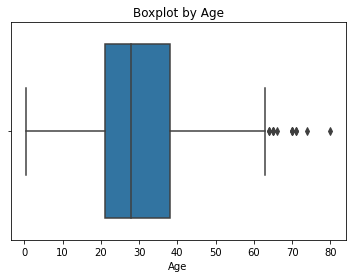

In [56]:
ax = sns.boxplot(x=titanic_new['Age'])
ax.set_title('Boxplot by Age')
plt.show()

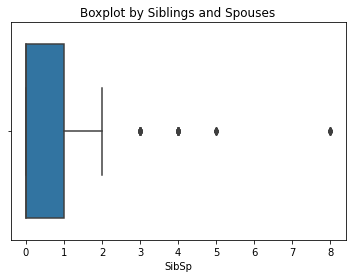

In [57]:
ax = sns.boxplot(x=titanic_new['SibSp'])
ax.set_title('Boxplot by Siblings and Spouses')
plt.show()

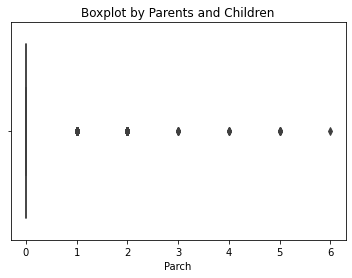

In [58]:
ax = sns.boxplot(x=titanic_new['Parch'])
ax.set_title('Boxplot by Parents and Children')
plt.show()

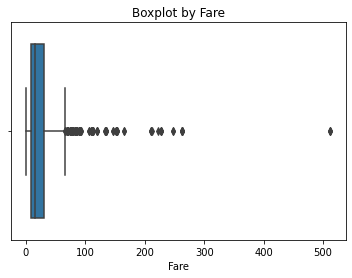

In [59]:
ax = sns.boxplot(x=titanic_new['Fare'])
ax.set_title('Boxplot by Fare')
plt.show()

In [60]:
#ax = sns.boxplot(y='Fare', x='Pclass', data= titanic_new)
#ax.set_title('Boxplot by Fare and Pclass')
#plt.show()

In [61]:
#titanic_new[titanic_new['Pclass'] == 1][['Fare','SibSp','Survived']].sort_values(by='Fare',ascending=False)

After we identify our outliers, let's drop them based on standard deviation approach and the again compare with boxplot in order to check whether all outliers are dropped.

## Dropping outliers based on standard deviation

In [62]:
# this function return a list of index values for the outliers 
def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = data[(data[col] > mean + 3*sd) | (data[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))



In [63]:
# here we define the columns where we have identified there could be outliers
columns_with_outliers = ['Age', 'SibSp', 'Parch', 'Fare']

# we call the function we just created on the cookies dataset
titanic_new_outliers_indexes = get_outliers(titanic_new, columns_with_outliers)

# and drop those values from our feature and target values
titanic_new_without_outliers = titanic_new.drop(titanic_new_outliers_indexes, axis = 0)


In [64]:
titanic_new_without_outliers

,PassengerId,Survived,Pclass,Name,Sex_male,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,13.0000,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0,0,112053,30.0000,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,22.0,1,2,W./C. 6607,23.4500,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,30.0000,0.0,0.0


Outliers are dropped. Now we have 825 passengers, before dropping outliers we had 891 passengers.

## Let's compare again with boxplot approach whether outliers are dropped.

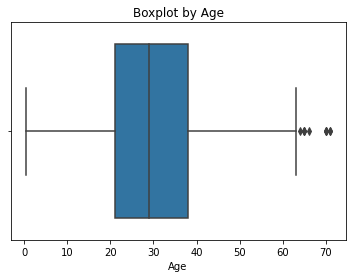

In [65]:
ax = sns.boxplot(x=titanic_new_without_outliers['Age'])
ax.set_title('Boxplot by Age')
plt.show()

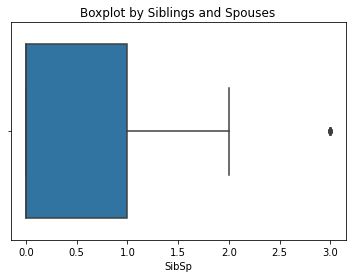

In [66]:
ax = sns.boxplot(x=titanic_new_without_outliers['SibSp'])
ax.set_title('Boxplot by Siblings and Spouses')
plt.show()

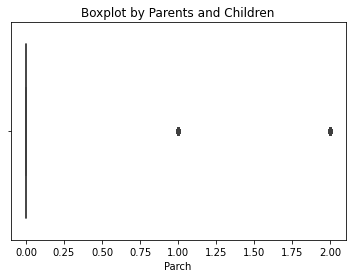

In [67]:
ax = sns.boxplot(x=titanic_new_without_outliers['Parch'])
ax.set_title('Boxplot by Parents and Children')
plt.show()

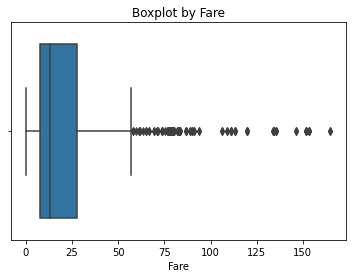

In [68]:
ax = sns.boxplot(x=titanic_new_without_outliers['Fare'])
ax.set_title('Boxplot by Fare')
plt.show()

Although we still observed that there are a few outliers, that may be newly generated outliers, now looks much better.

## Removing columns that aren't important for our models

In [69]:
titanic_new_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  825 non-null    int64  
 1   Survived     825 non-null    int64  
 2   Pclass       825 non-null    int64  
 3   Name         825 non-null    object 
 4   Sex_male     825 non-null    float64
 5   Age          825 non-null    float64
 6   SibSp        825 non-null    int64  
 7   Parch        825 non-null    int64  
 8   Ticket       825 non-null    object 
 9   Fare         825 non-null    float64
 10  Embarked_Q   825 non-null    float64
 11  Embarked_S   825 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 83.8+ KB


For our first modeling attempt we are not going to use the following variables:  
- `PassengerId`
- `Name`  
- `Ticket` 

Some of them are redundant for our model or required future cleaning. 


In [70]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket']

titanic_new_without_outliers.drop(columns_to_drop, axis=1, inplace=True)

In [71]:
titanic_new_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    825 non-null    int64  
 1   Pclass      825 non-null    int64  
 2   Sex_male    825 non-null    float64
 3   Age         825 non-null    float64
 4   SibSp       825 non-null    int64  
 5   Parch       825 non-null    int64  
 6   Fare        825 non-null    float64
 7   Embarked_Q  825 non-null    float64
 8   Embarked_S  825 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 64.5 KB


# Exporting data as `.csv`

## Exporting data for visualizations

In [72]:
titanic_new.to_csv('./data/train_cleaned_knn_imputation.csv')

## Exporting data for predictions

In [73]:
titanic_new_without_outliers.to_csv('./data/train_cleaned_knn_imputation_without_outliers.csv')